In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import random
import scipy.stats as stats
import seaborn as sns
from IPython.core.debugger import set_trace

/home/matielo/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.2' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/matielo/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:64: UserWarning: Pandas requires version '1.3.2' or newer of 'bottleneck' (version '1.2.1' currently installed).
  from pandas.core import (


In [27]:
#The function below does immunisation by solving 2 simultaneous equations 1)PV(Assets)=PV(Liabilities) and
#2) Duration(Assets)=Duration(Liabilities)
def zc_immuniser(m1,m2,m3,liab_duration):  #m1,m2,m3=maturity for zero coupon bond 1, bond 2 and bond 3
    A=[[1,1],[m1,m2,m3]]   
    B=[1,liab_duration]
    x=np.linalg.solve(A,B)
   
    weight1_interim=x[0]
    weight2_interim=x[1]
    weight3_interim=x[2]
    weight1=min(max(weight1_interim,0),1)
    weight2=min(max(weight2_interim,0),1)
    weight3=min(max(weight3_interim,0),1)
    result=np.array([m1,m2,m3, liab_duration,weight1,weight2,weight3])

In [28]:
def liability_duration_sim(steps,prob_increase,max_change,duration_start):
    
    duration_change_sign = np.random.choice(a=([1,-1]),p=([prob_increase,1-prob_increase]),size=steps)#increase or decrease 
    magnitude_of_duration_change =np.random.uniform(low=0,high=max_change,size=steps) 
    duration_change = duration_change_sign*magnitude_of_duration_change
    cumulative_duration_change=np.cumsum(duration_change)
    liab_duration_sim=duration_start+cumulative_duration_change

    return(liab_duration_sim)

In [29]:
def asset_term_sim(steps,change_sign,change_size,term_range_start,term_range_end):
    
    term_start = np.random.uniform(low=term_range_start,high=term_range_end,size=1) 
    change_sign_array = np.full((steps,),change_sign) 
    term_change = change_sign_array*change_size
    cumulative_term_change = np.cumsum(term_change)
    asset_term_sim = term_start+cumulative_term_change

    return(asset_term_sim)


In [30]:
def generate_one_simulation(steps,prob_increase,max_change,duration_start):
    one_liability_simulation=liability_duration_sim(steps,prob_increase,max_change,duration_start)
    one_asset1_simulation = asset_term_sim(steps,0,0,10,20)
    one_asset2_simulation = asset_term_sim(steps,0,0,20,30)
    one_asset3_simulation = asset_term_sim(steps,0,0,30,40)
    one_simulation = np.stack((one_asset1_simulation,one_asset2_simulation,one_asset3_simulation,one_liability_simulation),axis=1)
    return(one_simulation)

In [31]:
def generate_multiple_simulations(steps,number_simulations,max_change=0.5,duration_start=25):

    first_simulation = generate_one_simulation(steps,0.5,max_change,duration_start)
    first_simulation_reshaped = np.reshape(first_simulation,(1,first_simulation.shape[0],first_simulation.shape[1]))
    multiple_simulations = first_simulation_reshaped
    
    for i in np.arange(start=1,stop=number_simulations):
        prob_inc=np.random.uniform(low=0.3,high=0.7)   #specifying the ranges of drift
        ith_simulation = generate_one_simulation(steps,prob_inc,max_change,duration_start)
        ith_simulation_reshaped = np.reshape(ith_simulation,(1,ith_simulation.shape[0],ith_simulation.shape[1]))
        multiple_simulations = np.concatenate((multiple_simulations,ith_simulation_reshaped),axis=0)
    
    multiple_simulations = np.transpose(multiple_simulations,axes=(1,0,2))
    return(multiple_simulations)

In [32]:
#SIMULATING DATA FOR TRAINING FOR RESEARCH QUESTION 1
training_simulation=generate_multiple_simulations(steps=60,max_change=0.5,number_simulations=10000) #SIMULATING DATA FOR A YEAR, WHERE REBALANCING IS DONE EVERY MONTH 
training_simulation.shape

(60, 10000, 4)

FileNotFoundError: [Errno 2] No such file or directory: 'output/s1.png'

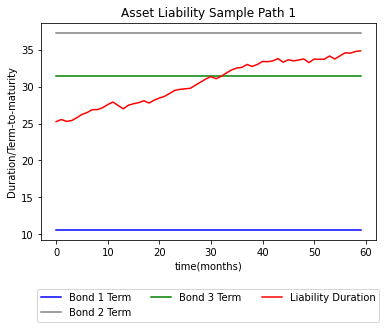

In [57]:
#Simulation 1
sim_index=38 #decreasing liability duration
asset1term=training_simulation[:,sim_index,0]
asset2term=training_simulation[:,sim_index,1]
asset2term=training_simulation[:,sim_index,2]
liabilities_duration=training_simulation[:,sim_index,3]
plt.plot(asset1term,color ="blue",label = "Bond 1 Term")
plt.plot(asset2term,color = "grey" ,label = "Bond 2 Term")
plt.plot(asset3term,color = "green" ,label = "Bond 3 Term")
plt.plot(liabilities_duration,color = "red",label = "Liability Duration")
plt.xlabel("time(months)")
plt.ylabel("Duration/Term-to-maturity")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2),ncol = 3)
plt.title("Asset Liability Sample Path 1")
plt.show
plt.savefig('output/s1.png', dpi=300, bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: 'output/s2.png'

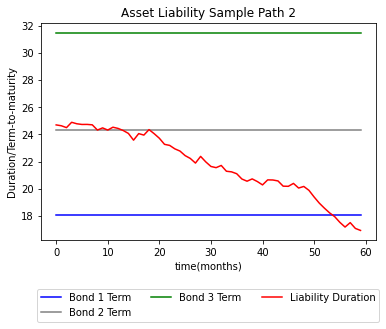

In [54]:
#Simulation 2
sim_index=4 #decreasing liability duration
asset1term=training_simulation[:,sim_index,0]
asset2term=training_simulation[:,sim_index,1]
asset3term=training_simulation[:,sim_index,2]
liabilities_duration=training_simulation[:,sim_index,3]
plt.plot(asset1term,color ="blue",label = "Bond 1 Term")
plt.plot(asset2term,color = "grey" ,label = "Bond 2 Term")
plt.plot(asset3term,color = "green" ,label = "Bond 3 Term")
plt.plot(liabilities_duration,color = "red",label = "Liability Duration")
plt.xlabel("time(months)")
plt.ylabel("Duration/Term-to-maturity")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2),ncol = 3)
plt.title("Asset Liability Sample Path 2")
plt.show
plt.savefig('output/s2.png', dpi=300, bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: 'output/s3.png'

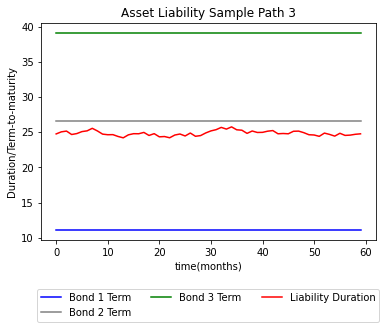

In [40]:
#Simulation 3
sim_index=8 #constant duration
asset1term=training_simulation[:,sim_index,0]
asset2term=training_simulation[:,sim_index,1]
asset3term=training_simulation[:,sim_index,2]
liabilities_duration=training_simulation[:,sim_index,3]
plt.plot(asset1term,color ="blue",label = "Bond 1 Term")
plt.plot(asset2term,color = "grey" ,label = "Bond 2 Term")
plt.plot(asset3term,color = "green" ,label = "Bond 3 Term")
plt.plot(liabilities_duration,color = "red",label = "Liability Duration")
plt.xlabel("time(months)")
plt.ylabel("Duration/Term-to-maturity")
plt.legend(loc="upper center",bbox_to_anchor=(0.5, -0.2),ncol = 3)
plt.title("Asset Liability Sample Path 3")
plt.show
plt.savefig('output/s3.png', dpi=300, bbox_inches="tight")

In [18]:
#T(Z1):random numbers between (10,20)
import numpy as np
import random

print(random.randint(10,20))

15


In [19]:
#T(Z2):random numbers between (20,30)
import numpy as np
import random

print(random.randint(20,30))

26


In [72]:
#T(Z3):random numbers between (30,40)
import numpy as np
import random

print(random.randint(30,40))

31


In [71]:
#T(L):random numbers between (15,35)
import numpy as np
import random

print(random.randint(15,35))

28


In [169]:
#T(L):random numbers between (10,20)
import numpy as np
import random
round(random.uniform(15, 35), 2)

31.83

In [142]:
import numpy as np

from scipy.optimize import minimize

# Define the function to be minimized
def objective_function(w):
    w1, w2, w3 = w
    T_Z1 =10.39 # Provide the term-to-maturity for Bond 1 
    T_Z2 = 28.03 # Provide the term-to-maturity for Bond 2 
    T_Z3 = 30.9 # Provide the term-to-maturity for Bond 3 
    T_L = 19.58 # Provide the weighted timing of the liability cash flows
    
    return (w1*T_Z1 + w2*T_Z2 + w3*T_Z3 - T_L)**2 + 1000*(w1 + w2 + w3 - 1)**2 

# Initial guess for the weights
initial_guess = [0.33, 0.33, 0.33]  # Initial guess, sum of weights = 1

# Define the bounds for the weights (0 <= w_i <= 1 for i=1,2,3)
bounds = [(0, 1), (0, 1), (0, 1)]

# Minimize the objective function
result = minimize(objective_function, initial_guess, bounds=bounds)

# Extract the optimized weights
optimized_weights = result.x

print("Optimized weights:", optimized_weights)


Optimized weights: [0.51513094 0.26294932 0.22191974]


In [31]:
w1,w2,w3 = 0.60805861, 0.30586083, 0.08608056
T_Z1 =15 #the term-to-maturity for Bond 1 
T_Z2 = 26 #the term-to-maturity for Bond 2 
T_Z3 = 34 #the term-to-maturity for Bond 3 
T_L = 20 #the weighted timing of the liability cash flows

print((w1*T_Z1 + w2*T_Z2 + w3*T_Z3 - T_L)**2)


5.2899998948441503e-14


In [3]:
import numpy as np
from scipy.optimize import minimize
import random

# Define the function to be minimized
def objective_function(w):
    w1, w2, w3 = w
    T_Z1 = 10.39
    T_Z2 = 28.03
    T_Z3 = 30.9
    T_L = round(random.uniform(15, 35), 2)
    D_it = 24.6
    
    return (w1*T_Z1 + w2*T_Z2 + w3*T_Z3 - T_L)**2 + 1000*(w1 + w2 + w3 - 1)**2
    # Calculate e_it
    e_it = w1 * T_Z1 + w2 * T_Z2 + w3 * T_Z3 - D_it
    
    return e_it

# Generate 60 random real numbers between (15, 35)
random_numbers = [random.uniform(15, 35) for i in range(60)]

# Define the bounds for the weights (0 <= w_i <= 1 for i=1,2,3)
bounds = [(0, 1), (0, 1), (0, 1)]

# Calculate optimized_weights for each random real number
for i, random_number in enumerate(random_numbers):
    initial_guess = [0.33, 0.33, 0.33]
    result = minimize(objective_function, initial_guess, bounds=bounds)
    optimized_weights = result.x
    
    e_it = objective_function(optimized_weights)
    
    print(f"For random number {i+1}: {random_number}")
    print("Optimized weights:", optimized_weights)
    print(f"e_it: {e_it}")
    print("="*30)


For random number 1: 34.11714775827326
Optimized weights: [0.33000476 0.33000476 0.33000476]
e_it: 0.14554073559158132
For random number 2: 33.837392952713486
Optimized weights: [0.3300037  0.32999807 0.33000369]
e_it: 6.986850427670826
For random number 3: 27.009596948350193
Optimized weights: [0.33000033 0.33000152 0.33000311]
e_it: 17.524327267961766
For random number 4: 23.969892709470827
Optimized weights: [0.32999997 0.33000006 0.33000006]
e_it: 40.988310596510985
For random number 5: 27.974353674405492
Optimized weights: [0.33000861 0.32999576 0.33000861]
e_it: 4.123121205349886
For random number 6: 16.96729746085778
Optimized weights: [0.33000014 0.32999993 0.33000014]
e_it: 52.871448859283575
For random number 7: 25.36887077511345
Optimized weights: [0.33 0.33 0.33]
e_it: 64.81237132884144
For random number 8: 33.44307662470527
Optimized weights: [0.33000514 0.33000538 0.32999745]
e_it: 3.538174875097702
For random number 9: 21.141228110040874
Optimized weights: [0.33000272 0.

For random number 59: 24.83341184162086
Optimized weights: [0.3299999  0.33000022 0.32999989]
e_it: 0.10309129488050203
For random number 60: 24.959088489510314
Optimized weights: [0.33000301 0.33000267 0.3300026 ]
e_it: 16.226374580487448
